In [ ]:
!pip install pyportfolioopt

In [ ]:
# Importing libraries for portfolio optimization
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
import pandas as pd
import numpy as np
from tabulate import tabulate
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel('Historical prices CAC40.xlsx')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
# log returns
returns = df.pct_change().dropna().apply(lambda x: np.log(1 + x))
# NaN values with mean return
returns = returns.fillna(returns.mean())

In [ ]:
# Calculating descriptive statistics
mean_returns = returns.mean()
std_returns = returns.std()
skewness = returns.apply(skew)
kurtosis = returns.apply(kurtosis)
median_returns = returns.median()
min_returns = returns.min()
max_returns = returns.max()

# Combine the statistics into a DataFrame
statistics_df = pd.DataFrame({
    'Mean': mean_returns,
    'Std Deviation': std_returns,
    'skewness' : skewness,
    'kurtosis' : kurtosis,
    'Median': median_returns,
    'Minimum': min_returns,
    'Maximum': max_returns
})


In [ ]:
#!pip install cvxpy

In [ ]:
# Number of assets
n = len(returns.columns)

# Expected monthly returns
mu_monthly = returns.mean().values

# Annualizing factor (assuming 12 months in a year)
annualizing_factor = 12

# Calculate annualized returns
mu_annualized = mu_monthly * annualizing_factor

# Print the annualized expected returns
for i in range(n):
    print(f"Expected Return for {returns.columns[i]}: {mu_annualized[i]:.6f}")


Expected Return for LVMH.PA: 0.202691
Expected Return for OREP.PA: 0.129890
Expected Return for HRMS.PA: 0.216867
Expected Return for TTEF.PA: 0.000680
Expected Return for SASY.PA: 0.022519
Expected Return for AIR.PA: 0.108042
Expected Return for SCHN.PA: 0.093585
Expected Return for AIRP.PA: 0.086835
Expected Return for ESLX.PA: 0.089436
Expected Return for BNPP.PA: 0.016453
Expected Return for PRTP.PA: 0.134543
Expected Return for AXAF.PA: 0.049051
Expected Return for SAF.PA: 0.121670
Expected Return for SGEF.PA: 0.069680
Expected Return for STLAM.PA: 0.125373
Expected Return for DAST.PA: 0.152619
Expected Return for PERP.PA: 0.088645
Expected Return for STMPA.PA: 0.217031
Expected Return for DANO.PA: 0.002269
Expected Return for ENGIE.PA: -0.031616
Expected Return for CAGR.PA: 0.007252
Expected Return for SGOB.PA: 0.043369
Expected Return for CAPP.PA: 0.127529
Expected Return for TCFP.PA: 0.122109
Expected Return for ORAN.PA: -0.013216
Expected Return for LEGD.PA: 0.079959
Expected 

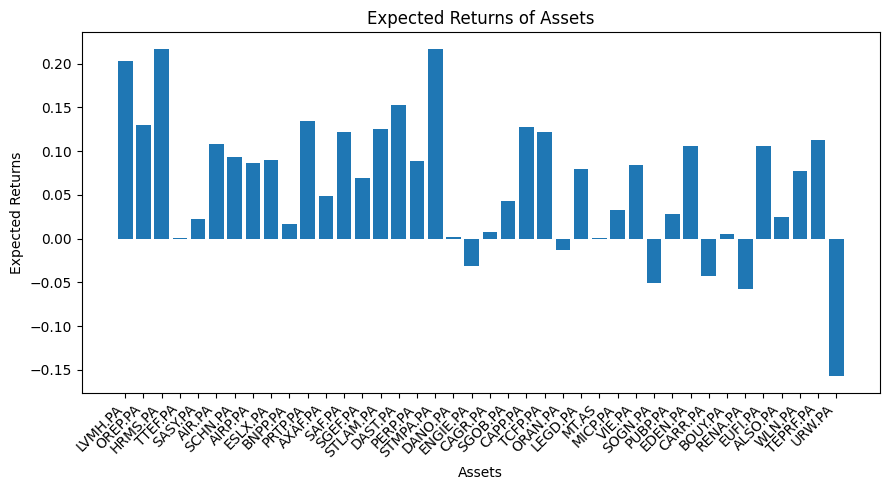

In [ ]:
# Ploting the expected returns using a bar chart
plt.figure(figsize=(9, 5))
plt.bar(range(n), mu_annualized, tick_label=returns.columns)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.xlabel("Assets")
plt.ylabel("Expected Returns")
plt.title("Expected Returns of Assets")
plt.tight_layout()
plt.show()

In [ ]:
# Number of assets
n = len(returns.columns)

# Calculate monthly variance of returns
variance_monthly = returns.var().values

# Calculate monthly standard deviation of returns (square root of variance)
std_deviation_monthly = np.sqrt(variance_monthly)

# Print the monthly variance and standard deviation for each stock
for i in range(n):
    print(f"Monthly Variance for {returns.columns[i]}: {variance_monthly[i]:.6f}")
    print(f"Monthly Std Deviation for {returns.columns[i]}: {std_deviation_monthly[i]:.6f}")


Monthly Variance for LVMH.PA: 0.004027
Monthly Std Deviation for LVMH.PA: 0.063460
Monthly Variance for OREP.PA: 0.002576
Monthly Std Deviation for OREP.PA: 0.050752
Monthly Variance for HRMS.PA: 0.004689
Monthly Std Deviation for HRMS.PA: 0.068474
Monthly Variance for TTEF.PA: 0.004771
Monthly Std Deviation for TTEF.PA: 0.069071
Monthly Variance for SASY.PA: 0.003131
Monthly Std Deviation for SASY.PA: 0.055957
Monthly Variance for AIR.PA: 0.010252
Monthly Std Deviation for AIR.PA: 0.101254
Monthly Variance for SCHN.PA: 0.004401
Monthly Std Deviation for SCHN.PA: 0.066342
Monthly Variance for AIRP.PA: 0.002571
Monthly Std Deviation for AIRP.PA: 0.050702
Monthly Variance for ESLX.PA: 0.003752
Monthly Std Deviation for ESLX.PA: 0.061251
Monthly Variance for BNPP.PA: 0.009726
Monthly Std Deviation for BNPP.PA: 0.098622
Monthly Variance for PRTP.PA: 0.006536
Monthly Std Deviation for PRTP.PA: 0.080845
Monthly Variance for AXAF.PA: 0.006837
Monthly Std Deviation for AXAF.PA: 0.082687
Monthl

In [ ]:
# Annualize variance and standard deviation
variance_annualized = variance_monthly * (annualizing_factor**2)
std_deviation_annualized = std_deviation_monthly * np.sqrt(annualizing_factor)

# Print the annualized variance and standard deviation for each stock
for i in range(n):
    print(f"Annualized Variance for {returns.columns[i]}: {variance_annualized[i]:.6f}")
    print(f"Annualized Std Deviation for {returns.columns[i]}: {std_deviation_annualized[i]:.6f}")


Annualized Variance for LVMH.PA: 0.579909
Annualized Std Deviation for LVMH.PA: 0.219831
Annualized Variance for OREP.PA: 0.370904
Annualized Std Deviation for OREP.PA: 0.175809
Annualized Variance for HRMS.PA: 0.675171
Annualized Std Deviation for HRMS.PA: 0.237201
Annualized Variance for TTEF.PA: 0.686996
Annualized Std Deviation for TTEF.PA: 0.239269
Annualized Variance for SASY.PA: 0.450891
Annualized Std Deviation for SASY.PA: 0.193841
Annualized Variance for AIR.PA: 1.476354
Annualized Std Deviation for AIR.PA: 0.350756
Annualized Variance for SCHN.PA: 0.633779
Annualized Std Deviation for SCHN.PA: 0.229815
Annualized Variance for AIRP.PA: 0.370180
Annualized Std Deviation for AIRP.PA: 0.175637
Annualized Variance for ESLX.PA: 0.540246
Annualized Std Deviation for ESLX.PA: 0.212180
Annualized Variance for BNPP.PA: 1.400594
Annualized Std Deviation for BNPP.PA: 0.341637
Annualized Variance for PRTP.PA: 0.941168
Annualized Std Deviation for PRTP.PA: 0.280055
Annualized Variance for

In [ ]:
#!pip install tabulate
# Covariance matrix
Sigma = np.cov(returns, rowvar=False).astype(np.float64)

# Get the column names
asset_names = returns.columns

# Create a list of lists to represent the table
table_data = [[asset_names[i]] + list(Sigma[i]) for i in range(len(asset_names))]

# Print the covariance matrix in table format
table = tabulate(table_data, headers=[""] + asset_names, tablefmt="grid")

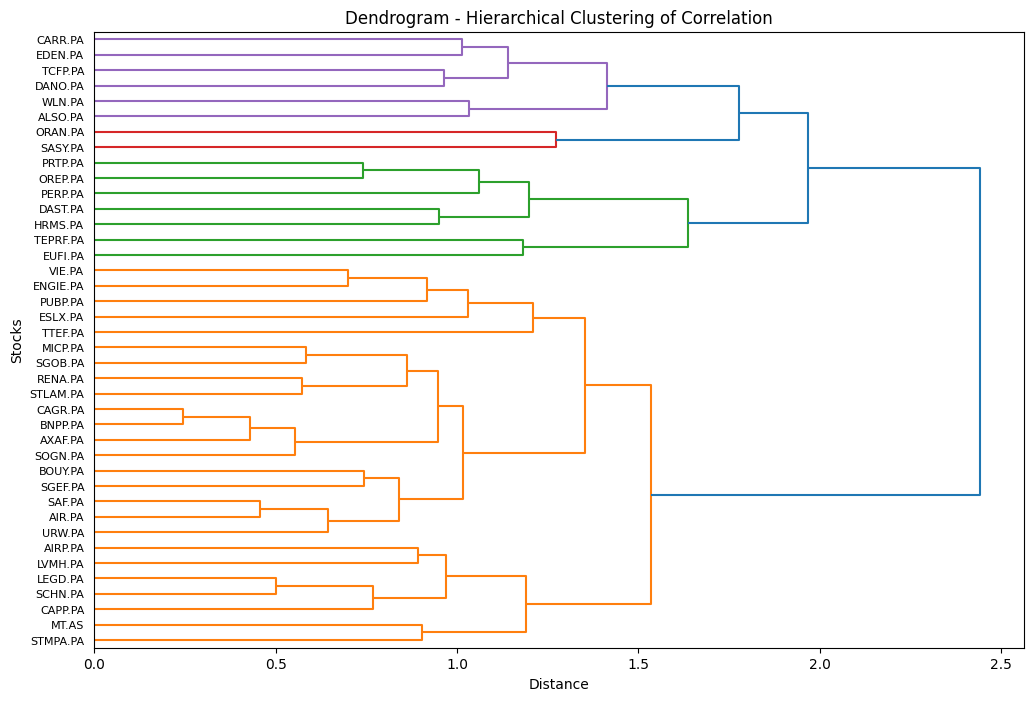

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Calculating the correlation matrix
correlation_matrix = returns.corr()

# linkage matrix
linkage_matrix = sch.linkage(correlation_matrix, method='complete')

# Creating a dendrogram
plt.figure(figsize=(12, 8))
dendrogram = sch.dendrogram(linkage_matrix, labels=returns.columns, orientation='right')

# Customize the plot
plt.title('Dendrogram - Hierarchical Clustering of Correlation')
plt.xlabel('Distance')
plt.ylabel('Stocks')
plt.show()


In [ ]:
##The France 10 Years Government Bond has a 3.117% yield (last update 3 Aug 2023)

In [ ]:
import cvxpy as cp

# Fixed weights (2.5% for each security)
w = np.full(n, 0.025)

# Variable for the portfolio weights
w = cp.Variable(n)

# Portfolio expected return
expected_return = mu_annualized @ w

# Portfolio variance
variance = cp.quad_form(w, Sigma)

# Problem constraints
constraints = [
    cp.sum(w) == 1,  # Sum of weights equals 1
    w >= 0  # Non-negative weights constraint
]

# Problem objective
objective = cp.Minimize(variance)

# Solve the problem
problem = cp.Problem(objective, constraints)
problem.solve()

# Optimal portfolio weights (equally weighted)
optimal_weights = w.value


In [ ]:
import numpy as np

# Assuming you have the covariance matrix Sigma and portfolio weights w
portfolio_variance = cp.quad_form(w, Sigma)
print("Portfolio Variance:", portfolio_variance)


Portfolio Variance: QuadForm(var4874, [[0.00402714 0.00212329 0.0029305  ... 0.00208514 0.00152287 0.00356924]
 [0.00212329 0.00257572 0.00206556 ... 0.0015482  0.00151419 0.00232355]
 [0.0029305  0.00206556 0.00468869 ... 0.00159941 0.00091045 0.00161657]
 ...
 [0.00208514 0.0015482  0.00159941 ... 0.00798064 0.00239973 0.00433758]
 [0.00152287 0.00151419 0.00091045 ... 0.00239973 0.00576546 0.00301942]
 [0.00356924 0.00232355 0.00161657 ... 0.00433758 0.00301942 0.01411117]])


In [ ]:
optimal_weights

array([ 2.31518149e-21, -1.10665741e-21,  1.02398637e-01,  3.10306927e-02,
        1.70935454e-01, -1.05263487e-21, -2.09572016e-21, -1.24430496e-21,
        5.06039580e-21, -5.60111551e-21, -1.60694408e-21, -3.51491341e-21,
       -6.08153492e-21,  4.54186245e-21, -1.02191312e-21,  8.72796945e-02,
        1.28639955e-01, -6.63452652e-21,  2.94640865e-02, -2.26910107e-21,
       -3.61588748e-21,  1.58413028e-21, -8.16295033e-22,  2.20789683e-02,
        2.29268808e-01,  2.89219198e-21, -5.69385523e-21,  3.51852034e-21,
        4.94751785e-21, -8.44131210e-21,  6.48883010e-21,  5.64787356e-03,
        5.07881096e-02,  9.33801037e-03,  1.72704254e-20,  8.27777480e-02,
        1.41232672e-02,  6.75791625e-03,  2.94707787e-02, -1.62588781e-21])

In [ ]:
import pandas as pd

# Define the stock names
stock_names = df.columns  # Assuming 'df' is your DataFrame with stock data

# Convert the optimal weights to percentages
optimal_weights_percent = optimal_weights * 100

# Create a dictionary with stock names as keys and optimal weights as values
weights_dict = {stock_name: weight for stock_name, weight in zip(stock_names, optimal_weights_percent)}

# Convert the dictionary to a DataFrame for better visualization
weights_df = pd.DataFrame.from_dict(weights_dict, orient='index', columns=['Optimal Weight (%)'])

# Sort the DataFrame by optimal weights
weights_df = weights_df.sort_values(by='Optimal Weight (%)', ascending=False)

# Print the DataFrame
weights_df


,Optimal Weight (%)
ORAN.PA,2.292688e+01
SASY.PA,1.709355e+01
PERP.PA,1.286400e+01
HRMS.PA,1.023986e+01
DAST.PA,8.727969e+00
EUFI.PA,8.277775e+00
CARR.PA,5.078811e+00
TTEF.PA,3.103069e+00
TEPRF.PA,2.947078e+00
DANO.PA,2.946409e+00
